# Generate hypothetical dataset for synthetic control demonstration
A promotion was implaments in NJ on March 2023. I was to evaluate it's effect. I am using PA, MI and IL as my donor pool to create the synthetic control for NJ. 

In this dataset, I produce a baseline of Daily Active Users (DAU) and natural NFL betting volume (# of bets), added seasonality factors to reflect the seasonal nature of sports. I also added a "treatment" effect, and effect of the promotion, for NJ DAU and betting volume. 

In [1]:
#pip install matplotlib pandas numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
np.random.seed(42) 
states = ['NJ', 'PA', 'MI', 'IL']
dates = pd.date_range(start='2022-01-01', end='2023-06-30', freq='D')
promo_start = '2023-03-01'
print(states)
print(promo_start)

['NJ', 'PA', 'MI', 'IL']
2023-03-01


In [8]:
data = [] 

for state in states:
    print(f"Processing state: {state}")
    # State-specific baseline activity
    base_handle = np.random.uniform(10000, 20000)
    base_users = np.random.uniform(500, 1000)
    
    for date in dates:
        # Seasonal effect: Higher during football season (Sep-Feb)
        month = date.month
        season_multiplier = 1.2 if month in [9, 10, 11, 12, 1, 2] else 1.0
        
        # Random daily fluctuation
        fluctuation = np.random.normal(1.0, 0.05)
        
        # Simulate handle and DAU
        handle = base_handle * season_multiplier * fluctuation
        dau = base_users * season_multiplier * fluctuation
        
        # Average bet number, cutoff at 0 and integer
        avg_bet_num = np.random.normal(3, 1)
        while avg_bet_num < 0:
            avg_bet_num = np.random.normal(3, 1)
        avg_bet_num = int(round(avg_bet_num))  # Convert to integer
        
        # Promotion effect for NJ after March 2023
        treatment = 1 if (state == 'NJ' and date >= pd.to_datetime(promo_start)) else 0
        promo_boost = 1.3 if treatment else 1.0  # 30% lift due to promo
        
        # Apply promo boost
        handle *= promo_boost
        dau *= promo_boost

        # Append the row of data for each date
        data.append([state, date, handle, dau, avg_bet_num, treatment])

Processing state: NJ
Processing state: PA
Processing state: MI
Processing state: IL


In [9]:
print(f"Data length: {len(data)}")
if data:
    df = pd.DataFrame(data, columns=['State', 'Date', 'Handle', 'DAU', 'AvgBetNum', 'Treatment'])
    print(df.head())
else:
    print("No data to display.")
print(f"States: {states}")
print(f"Dates: {dates}")
print(df.head())

Data length: 2184
  State       Date        Handle         DAU  AvgBetNum  Treatment
0    NJ 2022-01-01  19467.243464  713.863488          4          0
1    NJ 2022-01-02  16345.998204  599.407477          5          0
2    NJ 2022-01-03  18818.935727  690.090055          2          0
3    NJ 2022-01-04  18690.833329  685.392542          3          0
4    NJ 2022-01-05  17926.795415  657.375284          3          0
States: ['NJ', 'PA', 'MI', 'IL']
Dates: DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-24',
               '2023-06-25', '2023-06-26', '2023-06-27', '2023-06-28',
               '2023-06-29', '2023-06-30'],
              dtype='datetime64[ns]', length=546, freq='D')
  State       Date        Handle         DAU  AvgBetNum  Treatment
0    NJ 2022-01-01  194

In [10]:
# Add seasonality features
df['Month'] = df['Date'].dt.month
df['FootballSeason'] = df['Month'].isin([9, 10, 11, 12, 1, 2]).astype(int)

In [11]:
# Preview dataset
print(df.head())
df.to_csv('syntheticdat.csv', index=False)

  State       Date        Handle         DAU  AvgBetNum  Treatment  Month  \
0    NJ 2022-01-01  19467.243464  713.863488          4          0      1   
1    NJ 2022-01-02  16345.998204  599.407477          5          0      1   
2    NJ 2022-01-03  18818.935727  690.090055          2          0      1   
3    NJ 2022-01-04  18690.833329  685.392542          3          0      1   
4    NJ 2022-01-05  17926.795415  657.375284          3          0      1   

   FootballSeason  
0               1  
1               1  
2               1  
3               1  
4               1  


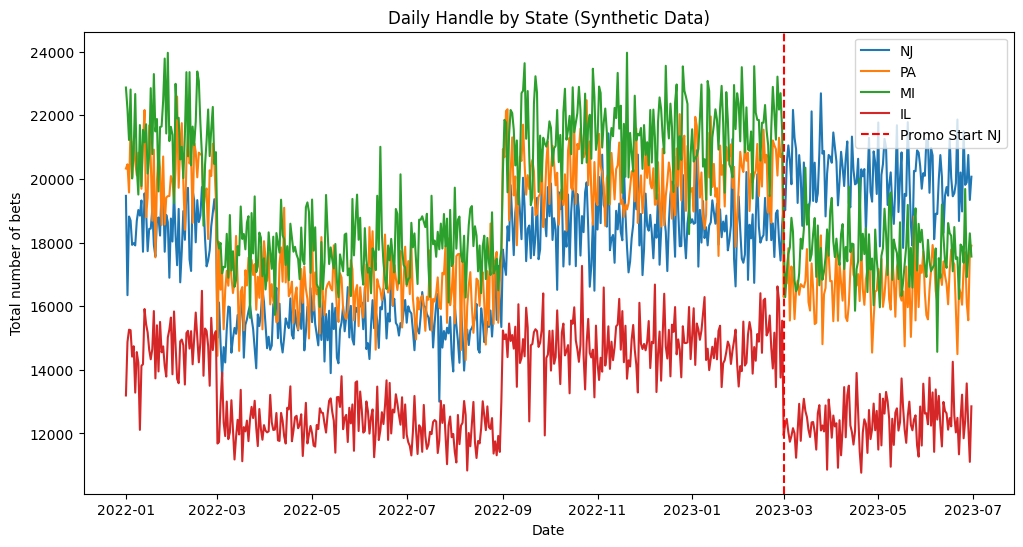

In [12]:
# Visualize
plt.figure(figsize=(12, 6))
for state in states:
    subset = df[df['State'] == state].groupby('Date')['Handle'].mean()
    plt.plot(subset.index, subset.values, label=state)
    
plt.axvline(pd.to_datetime(promo_start), color='red', linestyle='--', label='Promo Start NJ')
plt.legend()
plt.title('Daily Handle by State (Synthetic Data)')
plt.xlabel('Date')
plt.ylabel('Total number of bets')
plt.savefig('synthetic_data.png', format='png')
plt.show()